In [7]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Load Data

In [8]:
# Load the data as numpy arrays
img_1 = pd.read_csv('./../data/feaSubEImg_1.csv', header=None).to_numpy()
img_2 = pd.read_csv('./../data/feaSubEImg_2.csv', header=None).to_numpy()
overt_1 = pd.read_csv('./../data/feaSubEOvert_1.csv', header=None).to_numpy()
overt_2 = pd.read_csv('./../data/feaSubEOvert_2.csv', header=None).to_numpy()

### Baseline SVM function

In [10]:
def train_baseline_svm(class1_data, class2_data, C=1.0):
    # Stack and transpose data. Rows are trials, columns are features
    X = np.hstack((class1_data, class2_data)).T
    # Assigns a class label. 0 for first 120 rows, 1 for the next 120 rows
    y = np.array([0] * class1_data.shape[1] + [1] * class2_data.shape[1])

    # Train linear SVM
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X, y)

    # Get predictions and decision function
    y_pred = svm_model.predict(X)
    decision_scores = svm_model.decision_function(X)
    accuracy = accuracy_score(y, y_pred)

    return svm_model, X, y, y_pred, decision_scores, accuracy

### Plotting ROC

In [11]:
def plot_roc_curve(y_true, decision_scores, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, decision_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

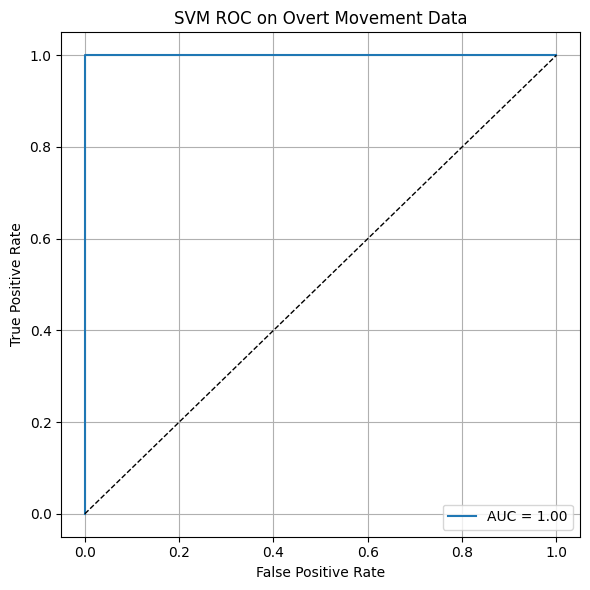

In [12]:
svm_model, X_overt, y_overt, y_pred, decision_scores, acc = train_baseline_svm(overt_1, overt_2)
plot_roc_curve(y_overt, decision_scores, title="SVM ROC on Overt Movement Data")